In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4 as nc

In [7]:
#read nc file to a numpy array
#read nc fil# 
ds = xr.open_dataset('C:\Phd\Objective Analysis\Homeworks\HW1\Data\TS_timeseries_cesmle_1850.nc')
#convert to numpy array
ds_ = ds.to_array()
type(ds)

NameError: name 'xr' is not defined

In [13]:
nc_file_path = 'C:\Phd\Objective Analysis\Homeworks\HW1\Data\TS_timeseries_cesmle_1850.nc'
TS_cesmle_1850_nc = nc.Dataset(nc_file_path, 'r')
nc_file_path = 'C:\Phd\Objective Analysis\Homeworks\HW1\Data\TS_timeseries_cesmle_1920_2100.nc'
TS_cesmle_1920_2100_nc = nc.Dataset(nc_file_path, 'r')
type(TS_cesmle_1850_nc)

netCDF4._netCDF4.Dataset

In [10]:
print(TS_cesmle_1850_nc.ncattrs())
print("--- Global Attributes ---")
for attr in TS_cesmle_1850_nc.ncattrs():
    print(f"{attr}: {TS_cesmle_1850_nc.getncattr(attr)}")

print("\n--- Dimensions ---")
for dim in TS_cesmle_1850_nc.dimensions:
    print(f"{dim}: {TS_cesmle_1850_nc.dimensions[dim].size}")

for dim in TS_cesmle_1850_nc.dimensions.values():
    print(dim)
    
# for 1920_2100
print(TS_cesmle_1920_2100_nc.ncattrs())
print("--- Global Attributes ---")
for attr in TS_cesmle_1920_2100_nc.ncattrs():
    print(f"{attr}: {TS_cesmle_1920_2100_nc.getncattr(attr)}")
    
print("\n--- Dimensions ---")
for dim in TS_cesmle_1920_2100_nc.dimensions:
    print(f"{dim}: {TS_cesmle_1920_2100_nc.dimensions[dim].size}")

for dim in TS_cesmle_1920_2100_nc.dimensions.values():
    print(dim)
    

['case', 'creation_date', 'source']
--- Global Attributes ---
case: b.e11.B1850C5CN.f09_g16.005
creation_date: Tue Aug  1 14:00:02 MDT 2017
source: CESMLE_timeseries.ncl

--- Dimensions ---
case: 0
year: 1801
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'case', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 1801
['case', 'creation_date', 'source']
--- Global Attributes ---
case: b.e11.B1850C5CN.f09_g16.005
creation_date: Tue Aug  1 14:00:02 MDT 2017
source: CESMLE_timeseries.ncl

--- Dimensions ---
case: 0
year: 1801
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'case', size = 0
<class 'netCDF4._netCDF4.Dimension'>: name = 'year', size = 1801


In [27]:
TS_cesmle_1920_2100_nc.variables.keys()

dict_keys(['gts_ann_allcesmle', 'member', 'year', 'ats_ann_allcesmle'])

In [14]:
TS_cesmle_1850_nc.variables.keys()

dict_keys(['gts_annual', 'year', 'ats_annual'])

In [28]:
# transform the nc file to a numpy array
# for 1850
gts_annual_1850 = TS_cesmle_1850_nc.variables['gts_annual']
gts_annual_1850_np = gts_annual_1850[:]
np.size(gts_annual_1850_np)
# for 1920_2100
# gts_annual_1920_2100 = TS_cesmle_1920_2100_nc.variables['gts_annual']
# gts_annual_1920_2100_np = gts_annual_1920_2100[:]
# np.size(gts_annual_1920_2100_np)


1801

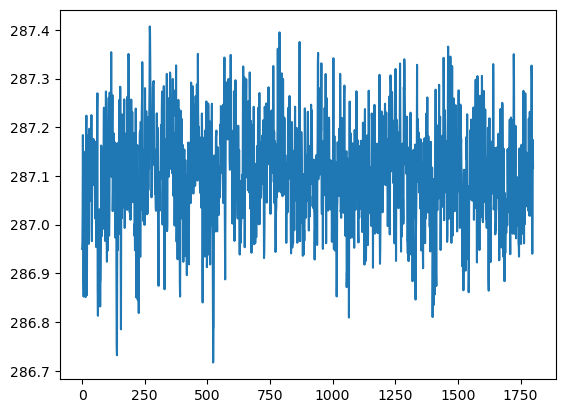

In [21]:
#plot gts_annual
plt.plot(gts_annual_1850_np)plt.show()

In [34]:
# standardizeing the gts_annual
gts_annual_1850_standard = ((gts_annual_1850_np - np.mean(gts_annual_1850_np)) / np.std(gts_annual_1850_np))


(array([0.04023515, 0.12875249, 0.3703272 , 1.46455959, 2.84864888,
        3.79015147, 3.16248308, 1.87578779, 0.66790355, 0.14484655]),
 array([286.7170105 , 286.78601074, 286.85501099, 286.92398071,
        286.99298096, 287.0619812 , 287.13098145, 287.19998169,
        287.26895142, 287.33795166, 287.4069519 ]),
 <BarContainer object of 10 artists>)

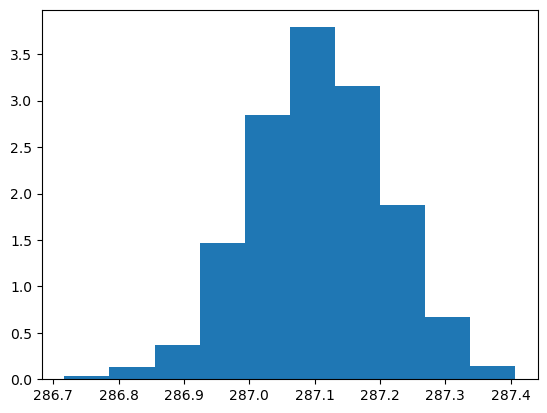

In [25]:
# histogram of gts_annual
plt.hist(gts_annual_1850_np, density=True)

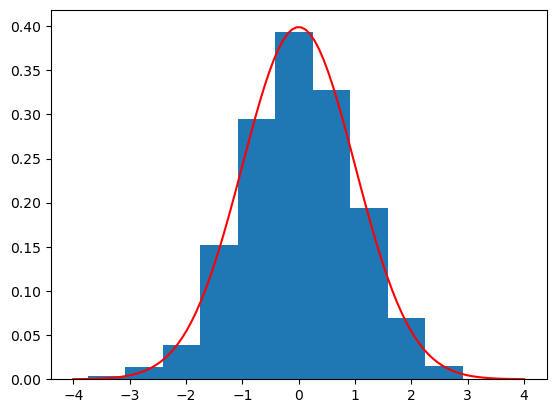

In [36]:
plt.hist(gts_annual_1850_standard, density=True)
#plot a standard normal distribution
x = np.linspace(-4, 4, 100)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
plt.plot(x, y, 'r')